# data mining<span style="color: orange"> INEGI-PROJECT</span>
# Javier Can
- <span style = "color :orange">  KDD process for INEGI data </span>

For this project, I utilized a dataset provided by INEGI to explore associations between a target variable and to construct a linear regression model with a high degree of precision. This entailed a thorough analysis of the independent variables that relate to the target variable, accompanied by a comprehensive data preprocessing stage.

## load data and libraries

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats

In [2]:
#LOAD DATA 
df = pd.read_csv('cgpv2000_iter_31.csv', index_col=0)
#DATAFRAME HEAD
df.head()

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,Yucatán,0,Total de la entidad Yucatán,0,TOTAL DE LA ENTIDAD,NaN,NaN,NaN,1658210,818205,...,193149,105081,74913,86783,387573,319320,68253,1645489,1408724,236765
31,Yucatán,0,Total de la entidad Yucatán,9998,LOCALIDADES DE UNA VIVIENDA,NaN,NaN,NaN,7296,4472,...,136,67,98,132,2051,1988,63,7002,6783,219
31,Yucatán,0,Total de la entidad Yucatán,9999,LOCALIDADES DE DOS VIVIENDAS,NaN,NaN,NaN,2993,1662,...,46,29,51,43,688,647,41,2865,2700,165
31,Yucatán,1,Abalá,0,TOTAL MUNICIPAL,NaN,NaN,NaN,5230,2701,...,222,7,1,27,1244,1112,132,5214,4723,491
31,Yucatán,1,Abalá,1,ABALA,894047.0,203848.0,17.0,1614,824,...,100,1,1,16,387,348,39,1606,1479,127


In [3]:
df.tail(100)

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,Yucatán,102,Valladolid,740,KAUAN,880106.0,203214.0,27.0,3,*,...,*,*,*,*,*,*,*,*,*,*
31,Yucatán,102,Valladolid,741,NOH CHACA,880230.0,203406.0,27.0,29,12,...,0,0,0,0,5,5,0,29,29,0
31,Yucatán,102,Valladolid,9998,LOCALIDADES DE UNA VIVIENDA,NaN,NaN,NaN,466,261,...,9,9,11,8,108,99,9,466,443,23
31,Yucatán,102,Valladolid,9999,LOCALIDADES DE DOS VIVIENDAS,NaN,NaN,NaN,368,186,...,2,0,2,1,67,61,6,368,350,18
31,Yucatán,103,Xocchel,0,TOTAL MUNICIPAL,NaN,NaN,NaN,2824,1441,...,109,7,9,17,618,532,86,2812,2495,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Yucatán,106,Yobaín,28,MONTE BELLO,890605.0,211855.0,4.0,3,*,...,*,*,*,*,*,*,*,*,*,*
31,Yucatán,106,Yobaín,32,SAN PABLO,890745.0,211345.0,4.0,1,*,...,*,*,*,*,*,*,*,*,*,*
31,Yucatán,106,Yobaín,38,LAKIN HA,890458.0,211428.0,1.0,5,*,...,*,*,*,*,*,*,*,*,*,*


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642 entries, 31 to 31
Columns: 131 entries, nom_ent to phogjeff
dtypes: float64(3), int64(4), object(124)
memory usage: 3.7+ MB


In [5]:
len(df)

3642

In [6]:
df.isnull().sum()

nom_ent     0
mun         0
nom_mun     0
loc         0
nom_loc     0
           ..
hogjefm     0
hogjeff     0
pobhog      0
phogjefm    0
phogjeff    0
Length: 131, dtype: int64

In [7]:
df.isna().sum()

nom_ent     0
mun         0
nom_mun     0
loc         0
nom_loc     0
           ..
hogjefm     0
hogjeff     0
pobhog      0
phogjefm    0
phogjeff    0
Length: 131, dtype: int64

In [8]:
df.shape

(3642, 131)

# preprocessing
- data cleaning


In [9]:
df.describe()

,mun,loc,longitud,latitud,altitud,pobtot,totvivhab
count,3642.000000,3642.000000,3363.000000,3363.000000,3363.000000,3.642000e+03,3642.000000
mean,64.132070,720.349808,885172.224205,206997.088017,19.156111,1.371556e+03,309.098298
std,31.473855,2097.559001,6844.079462,4404.245586,16.941944,3.194226e+04,7361.535012
min,0.000000,0.000000,873212.000000,193906.000000,0.000000,1.000000e+00,1.000000
25%,39.000000,27.000000,880700.000000,203827.500000,9.000000,2.000000e+00,1.000000
50%,66.000000,107.500000,883200.000000,205447.000000,16.000000,6.000000e+00,1.000000
75%,96.000000,406.000000,892045.500000,211153.500000,26.000000,2.600000e+01,5.000000
max,106.000000,9999.000000,902400.000000,213630.000000,150.000000,1.658210e+06,373432.000000


Upon analyzing this information from the .describe function, it is evident that the basic statistical measures either lack significant correlation or are considerably dispersed, taking into consideration the mean and standard deviation.

In [10]:
#drop the NaN values and  the "*" values

df = df[df != '*'] 
df = df.dropna() 

df.head()


,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,Yucatán,1,Abalá,1,ABALA,894047.0,203848.0,17.0,1614,824,...,100,1,1,16,387,348,39,1606,1479,127
31,Yucatán,1,Abalá,3,MUCUYCHE,893615.0,203720.0,12.0,435,220,...,9,0,0,0,111,101,10,435,409,26
31,Yucatán,1,Abalá,5,SIHUNCHEN,894048.0,204135.0,12.0,294,159,...,27,1,0,2,72,71,1,294,291,3
31,Yucatán,1,Abalá,6,TEMOZON,893908.0,204123.0,9.0,634,332,...,47,1,0,4,156,143,13,634,583,51
31,Yucatán,1,Abalá,7,UAYALCEH,893538.0,204140.0,9.0,1759,905,...,24,2,0,3,393,334,59,1755,1518,237


In [11]:
df.shape

(994, 131)

In [12]:
#chech if there are any NaN values
df.isnull().sum()



nom_ent     0
mun         0
nom_mun     0
loc         0
nom_loc     0
           ..
hogjefm     0
hogjeff     0
pobhog      0
phogjefm    0
phogjeff    0
Length: 131, dtype: int64

In [13]:
df.tail()

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,Yucatán,105,Yaxkukul,1,YAXKUKUL,892512.0,210342.0,8.0,2328,1196,...,218,35,15,51,589,509,80,2320,2065,255
31,Yucatán,105,Yaxkukul,2,SAN JUAN DE LAS FLORES,892506.0,210422.0,8.0,15,10,...,2,1,1,0,4,4,0,15,15,0
31,Yucatán,105,Yaxkukul,7,SAN FRANCISCO,892505.0,210238.0,8.0,22,12,...,3,1,0,0,5,5,0,22,22,0
31,Yucatán,106,Yobaín,1,YOBAIN,890700.0,211357.0,4.0,1717,886,...,181,14,19,35,441,399,42,1717,1582,135
31,Yucatán,106,Yobaín,2,CHABIHAU,890705.0,212125.0,5.0,326,172,...,40,5,2,10,84,81,3,302,296,6


In [14]:
#check the missing values

df.isnull().sum()

nom_ent     0
mun         0
nom_mun     0
loc         0
nom_loc     0
           ..
hogjefm     0
hogjeff     0
pobhog      0
phogjefm    0
phogjeff    0
Length: 131, dtype: int64

In [15]:

#chech the data types

df.dtypes


nom_ent     object
mun          int64
nom_mun     object
loc          int64
nom_loc     object
             ...  
hogjefm     object
hogjeff     object
pobhog      object
phogjefm    object
phogjeff    object
Length: 131, dtype: object

In [16]:
df.head()

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,Yucatán,1,Abalá,1,ABALA,894047.0,203848.0,17.0,1614,824,...,100,1,1,16,387,348,39,1606,1479,127
31,Yucatán,1,Abalá,3,MUCUYCHE,893615.0,203720.0,12.0,435,220,...,9,0,0,0,111,101,10,435,409,26
31,Yucatán,1,Abalá,5,SIHUNCHEN,894048.0,204135.0,12.0,294,159,...,27,1,0,2,72,71,1,294,291,3
31,Yucatán,1,Abalá,6,TEMOZON,893908.0,204123.0,9.0,634,332,...,47,1,0,4,156,143,13,634,583,51
31,Yucatán,1,Abalá,7,UAYALCEH,893538.0,204140.0,9.0,1759,905,...,24,2,0,3,393,334,59,1755,1518,237


In [17]:
#convert the data types

text_columns = df.select_dtypes(include=['object']).columns
for column in text_columns:
    df[column] = df[column].astype('category').cat.codes #convert to categorical data to numerical data
    
    
df.dtypes   

nom_ent      int8
mun         int64
nom_mun      int8
loc         int64
nom_loc     int16
            ...  
hogjefm     int16
hogjeff     int16
pobhog      int16
phogjefm    int16
phogjeff    int16
Length: 131, dtype: object

In [18]:
len(df)

994

In [19]:
df.head()

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pmascul,...,vp_lavad,vp_telef,vp_boiler,vp_autom,tothog,hogjefm,hogjeff,pobhog,phogjefm,phogjeff
entidad,,,,,,,,,,,,,,,,,,,,,
31,0,1,0,1,1,894047.0,203848.0,17.0,1614,399,...,3,1,1,17,179,163,82,99,75,32
31,0,1,0,3,336,893615.0,203720.0,12.0,435,165,...,168,0,0,0,13,2,2,350,328,88
31,0,1,0,5,606,894048.0,204135.0,12.0,294,94,...,76,1,0,26,276,273,1,247,237,98
31,0,1,0,6,653,893908.0,204123.0,9.0,634,239,...,122,1,0,59,58,45,16,430,401,157
31,0,1,0,7,703,893538.0,204140.0,9.0,1759,415,...,69,23,0,42,181,155,104,115,84,82


In [25]:
#save the data frame in a parquet file  

df.to_parquet('cgpv2000_iter_31.parquet.gzip',compression='gzip')





# data selection


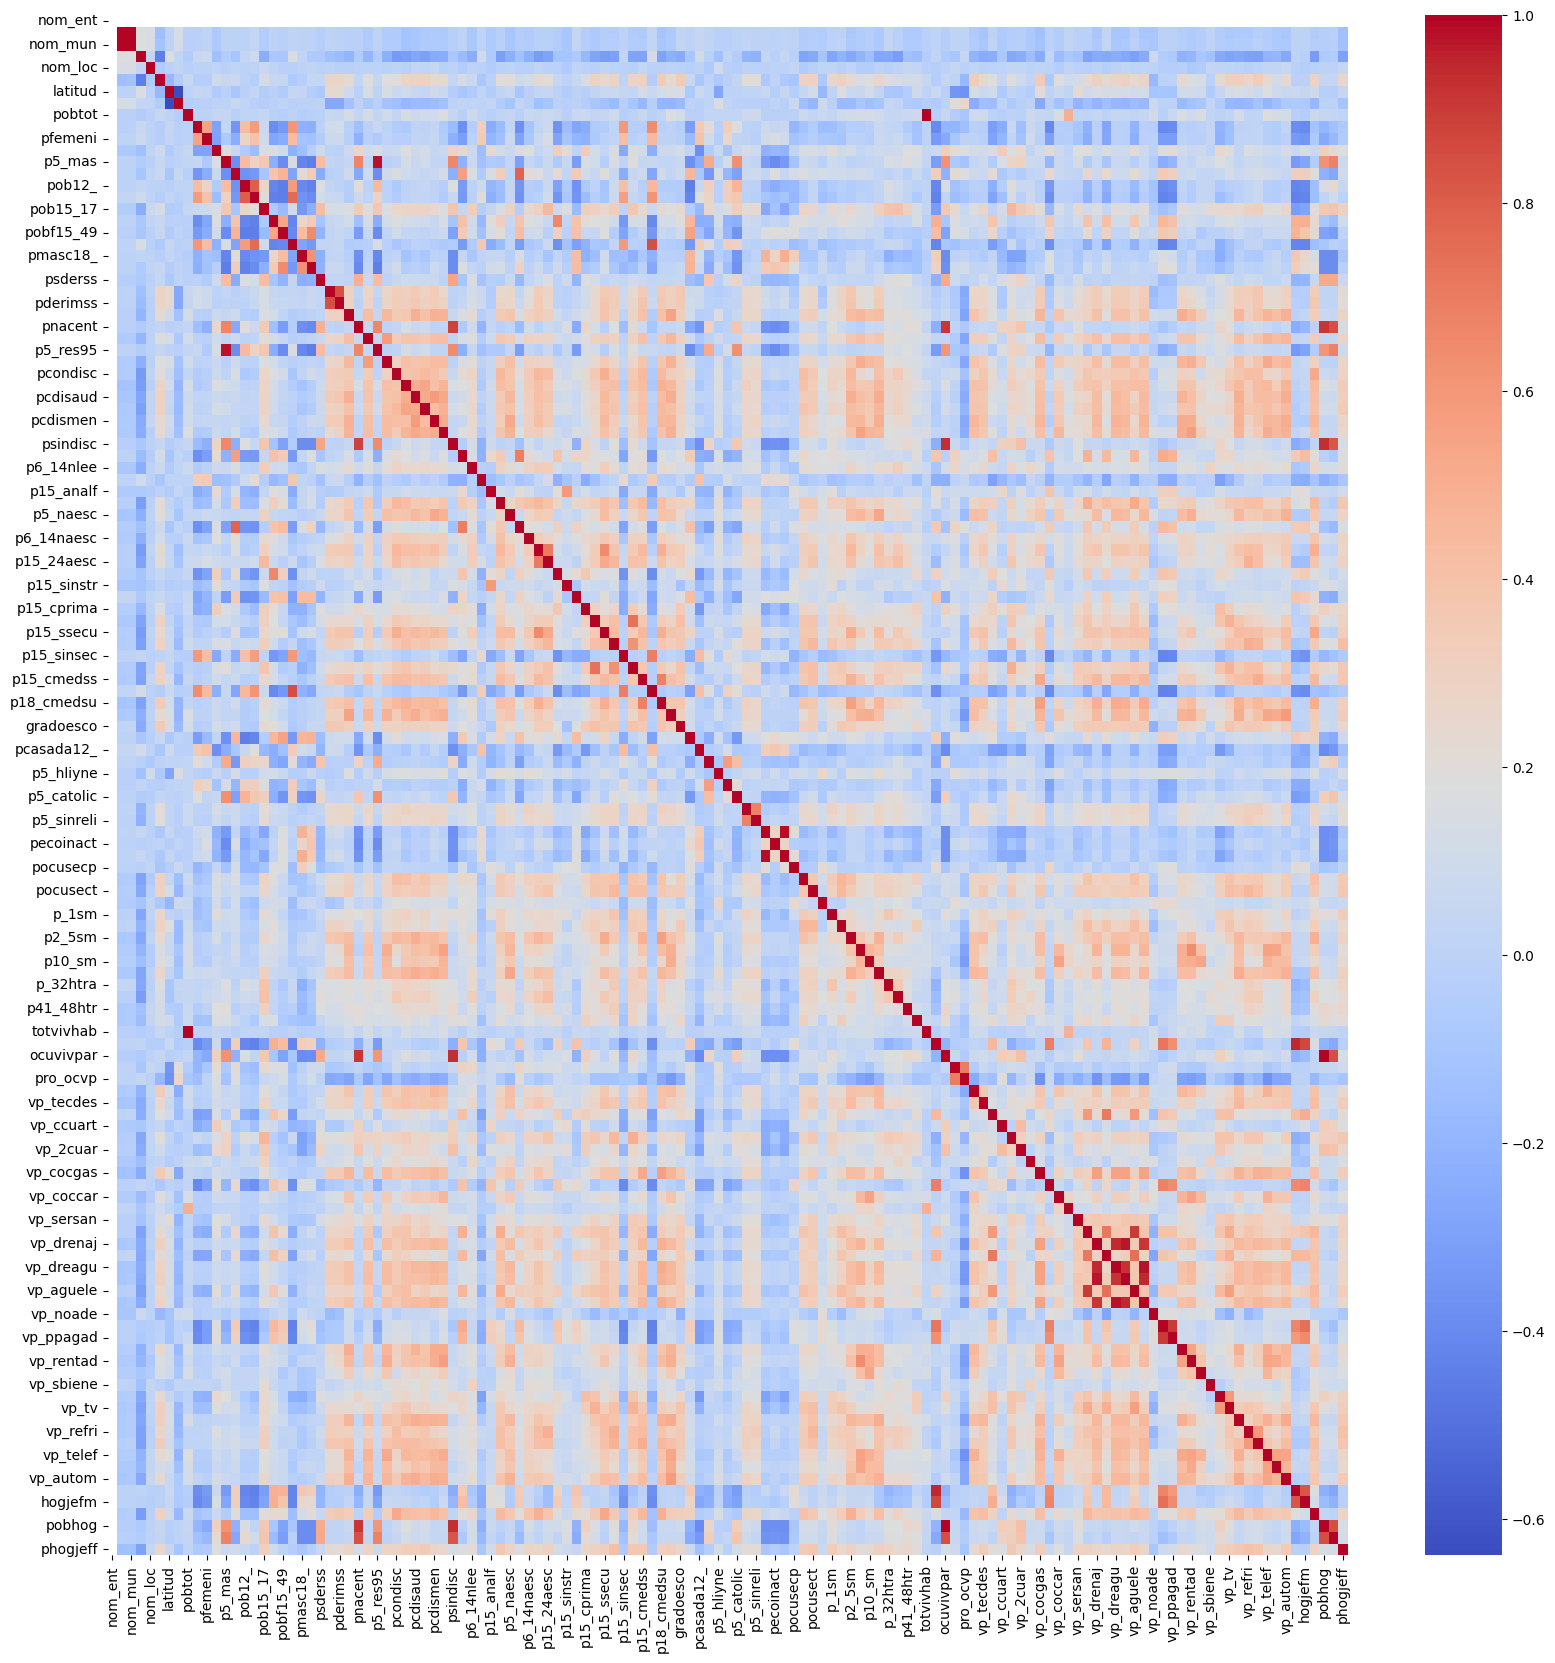

In [ ]:
#do a correlation matrix

corr = df.corr()

corr

#plot the correlation matrix

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.show()



selected target : 'psindisc'


Upon observation, it becomes apparent that the target variable exhibits varying degrees of correlation. As a result, we can eliminate those with a lighter shade of blue and select the ones with a more intense color. By leveraging the target variable, we can arrange them in descending order of correlation, from the highest to the lowest.

In [ ]:
#verifiy the correlation between the variables and the target

correlation_with_target = df.corr()['psindisc']
sorted_correlation = correlation_with_target.sort_values(ascending=False)

sorted_correlation

psindisc      1.000000
pobhog        0.932293
ocuvivpar     0.932214
pnacent       0.883534
phogjefm      0.826934
                ...   
pecoactiv    -0.374505
pcasada12_   -0.375110
pfemen18_    -0.382769
pmasc18_     -0.387088
nom_ent            NaN
Name: psindisc, Length: 131, dtype: float64

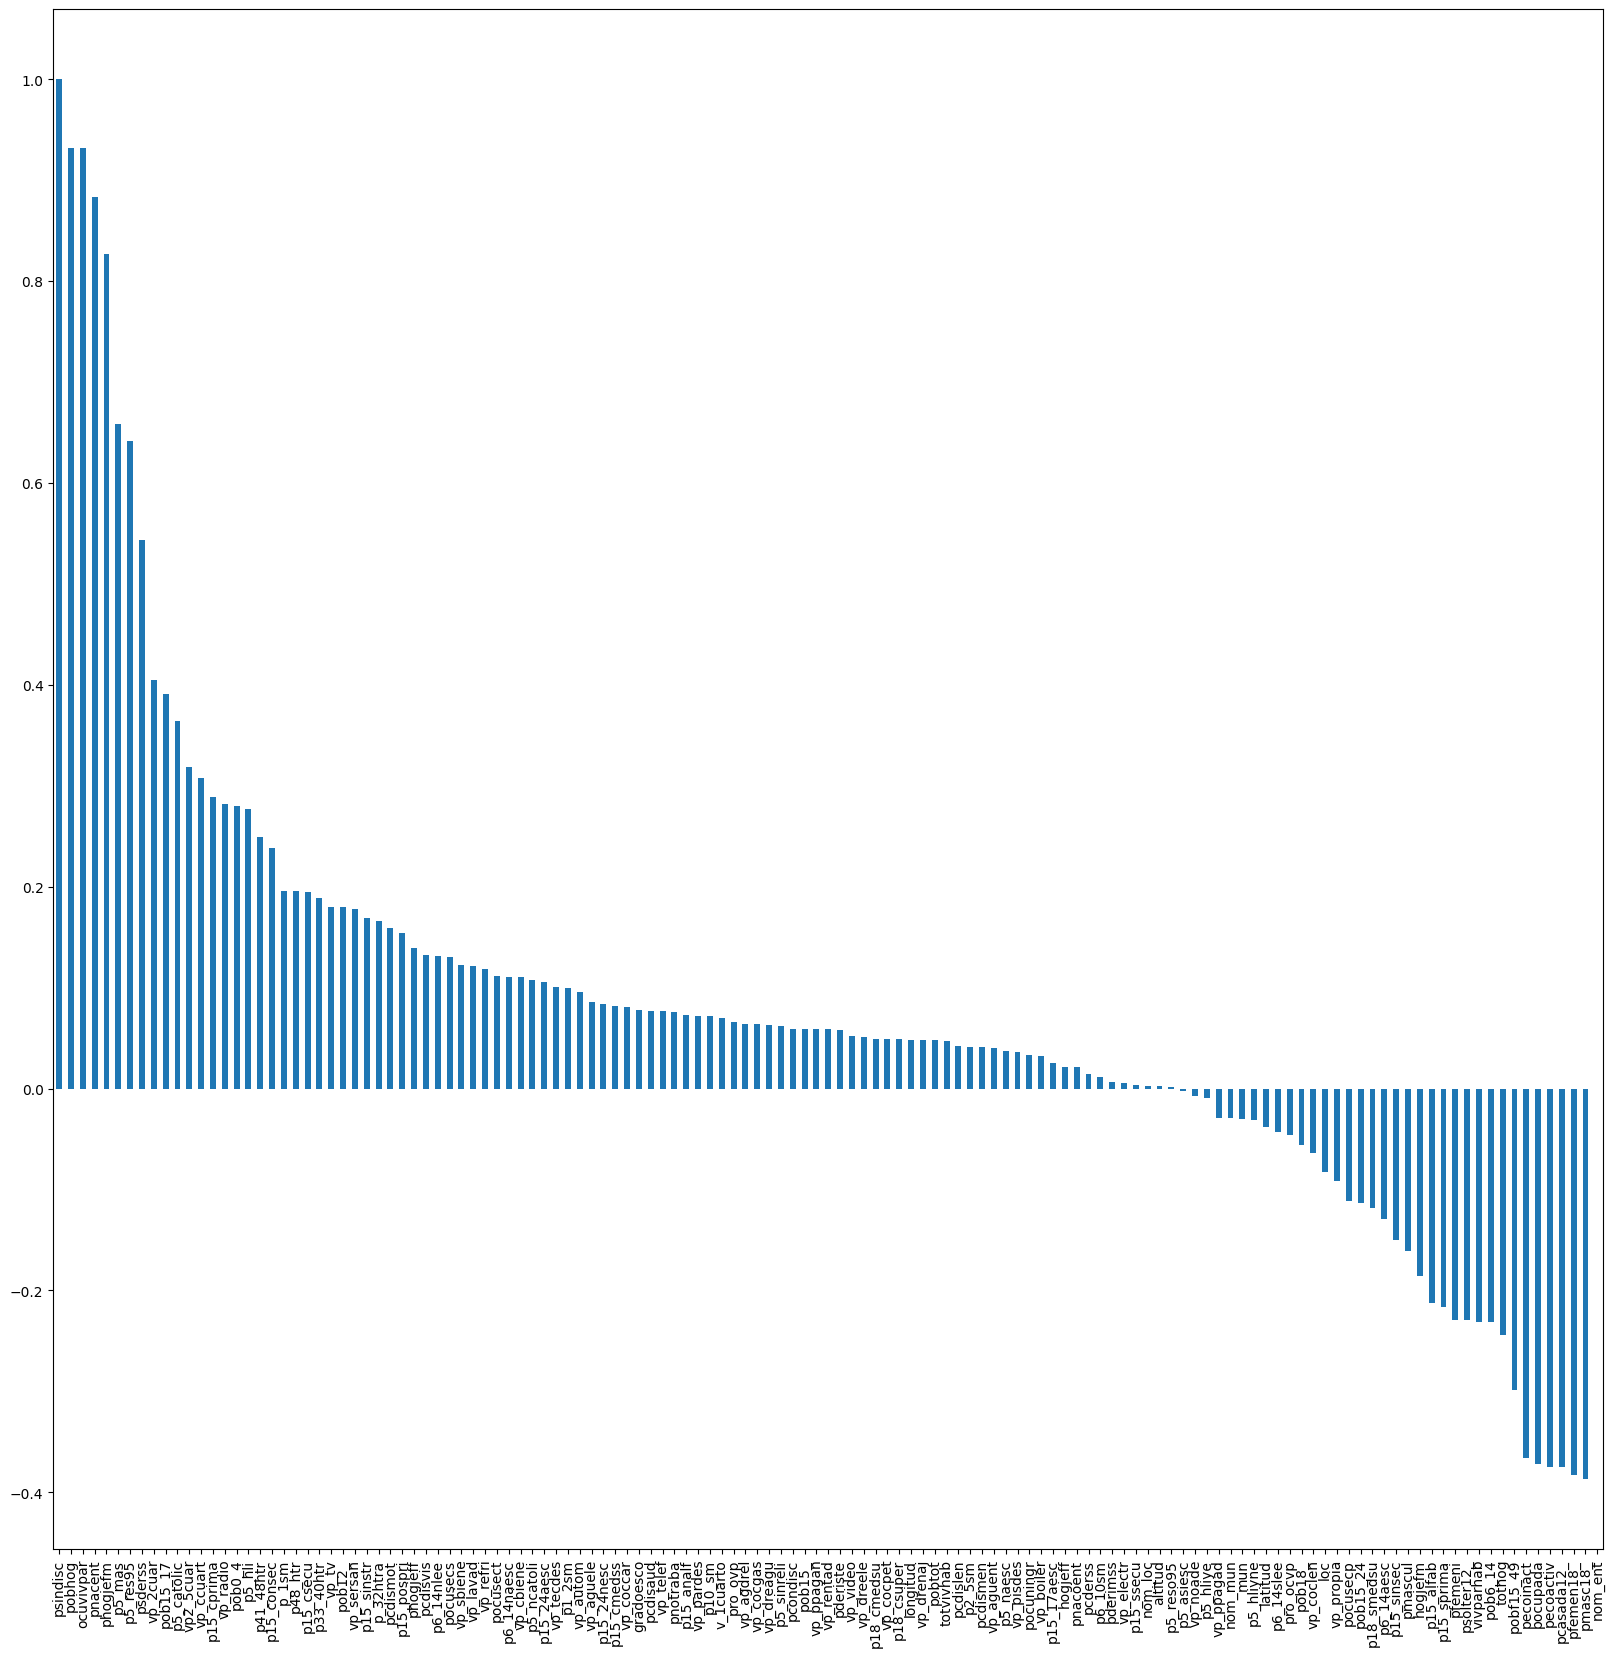

In [ ]:
##show the columns with the correlation with the target variable in a bar plot

plt.figure(figsize=(20,20))

sorted_correlation.plot(kind='bar')

plt.show()



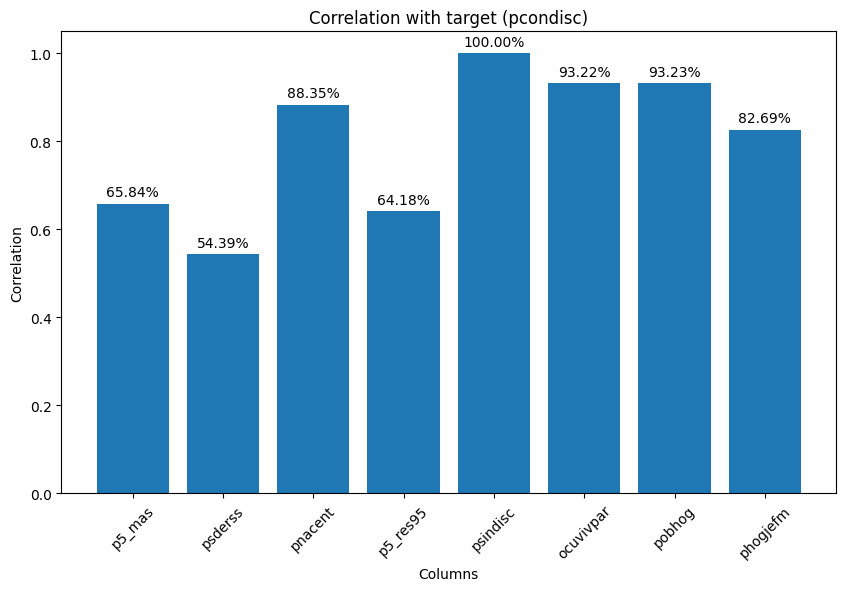

In [ ]:
#select the columns with a correlation greater than 0.5


selected_columns = correlation_with_target[correlation_with_target >= 0.5].index

plt.figure(figsize=(10, 6))
ax = plt.bar(selected_columns, correlation_with_target[selected_columns])


for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Distancia del texto a la barra
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('Correlation with target (pcondisc)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()




the most columns that have a high correlation with the target 

In [ ]:
#do a data frame with the selected columns

df_selected = df[selected_columns]

df_selected.columns

Index(['p5_mas', 'psderss', 'pnacent', 'p5_res95', 'psindisc', 'ocuvivpar',
       'pobhog', 'phogjefm'],
      dtype='object')

In [ ]:
df_selected.head()

,p5_mas,psderss,pnacent,p5_res95,psindisc,ocuvivpar,pobhog,phogjefm
entidad,,,,,,,,
31,73,391,95,73,91,99,99,75
31,311,296,346,307,335,350,350,328
31,210,414,244,203,230,247,247,237
31,390,84,420,384,391,429,430,401
31,82,62,108,79,112,115,115,84


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 31 to 31
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   p5_mas     994 non-null    int16
 1   psderss    994 non-null    int16
 2   pnacent    994 non-null    int16
 3   p5_res95   994 non-null    int16
 4   psindisc   994 non-null    int16
 5   ocuvivpar  994 non-null    int16
 6   pobhog     994 non-null    int16
 7   phogjefm   994 non-null    int16
dtypes: int16(8)
memory usage: 23.3 KB


In [ ]:
df_selected.shape

(994, 8)

In [ ]:
df_selected.describe()

,p5_mas,psderss,pnacent,p5_res95,psindisc,ocuvivpar,pobhog,phogjefm
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,239.554326,232.029175,240.909457,235.469819,239.032193,239.897384,240.112676,233.750503
std,151.687758,145.873872,151.533444,148.787559,150.725874,153.146007,153.304597,150.971437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,102.000000,104.000000,102.000000,104.000000,101.250000,102.250000,102.250000
50%,225.500000,229.500000,230.000000,220.500000,230.500000,233.500000,233.500000,220.500000
75%,375.000000,362.000000,370.000000,370.000000,369.000000,375.750000,375.750000,366.000000
max,506.000000,494.000000,518.000000,497.000000,516.000000,524.000000,524.000000,505.000000


we can observe the describe  of the new data frame is correct due to the mean and std are close between them

array([[<Axes: xlabel='p5_mas', ylabel='p5_mas'>,
        <Axes: xlabel='psderss', ylabel='p5_mas'>,
        <Axes: xlabel='pnacent', ylabel='p5_mas'>,
        <Axes: xlabel='p5_res95', ylabel='p5_mas'>,
        <Axes: xlabel='psindisc', ylabel='p5_mas'>,
        <Axes: xlabel='ocuvivpar', ylabel='p5_mas'>,
        <Axes: xlabel='pobhog', ylabel='p5_mas'>,
        <Axes: xlabel='phogjefm', ylabel='p5_mas'>],
       [<Axes: xlabel='p5_mas', ylabel='psderss'>,
        <Axes: xlabel='psderss', ylabel='psderss'>,
        <Axes: xlabel='pnacent', ylabel='psderss'>,
        <Axes: xlabel='p5_res95', ylabel='psderss'>,
        <Axes: xlabel='psindisc', ylabel='psderss'>,
        <Axes: xlabel='ocuvivpar', ylabel='psderss'>,
        <Axes: xlabel='pobhog', ylabel='psderss'>,
        <Axes: xlabel='phogjefm', ylabel='psderss'>],
       [<Axes: xlabel='p5_mas', ylabel='pnacent'>,
        <Axes: xlabel='psderss', ylabel='pnacent'>,
        <Axes: xlabel='pnacent', ylabel='pnacent'>,
        <Axes

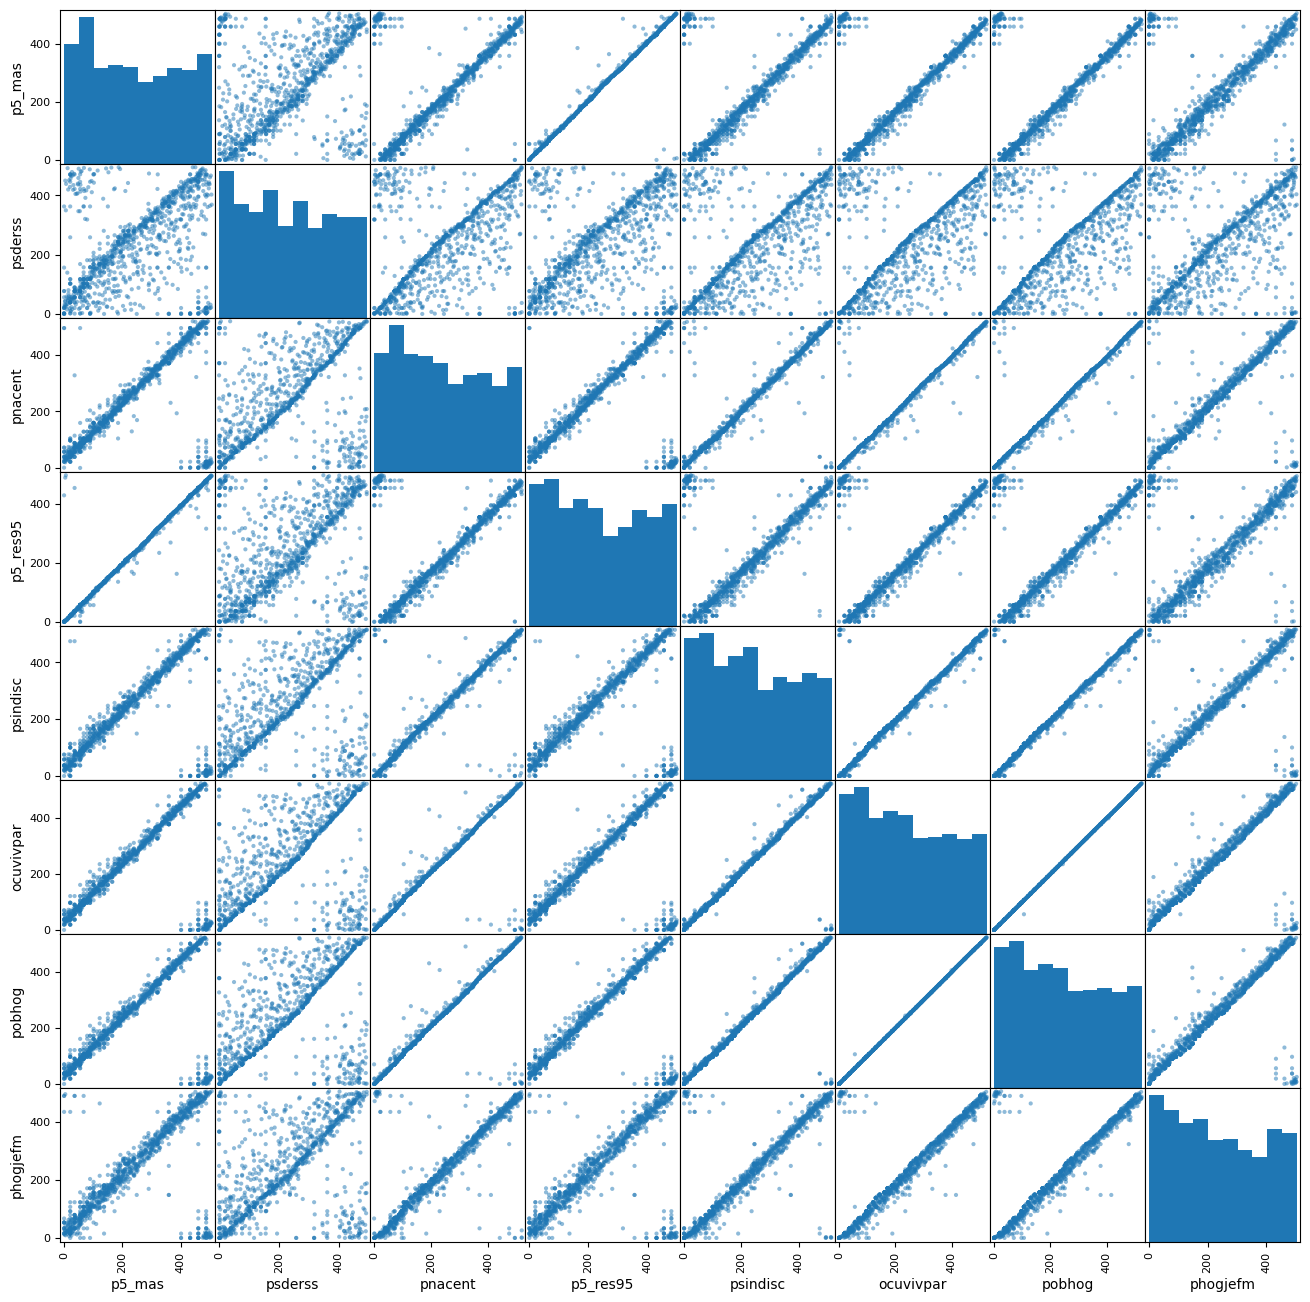

In [ ]:
# draw a matrix of scatter plots of the data set in a shape of 16" width x 16" height
# to roughly determine if there is a linear correlation between multiple variables

pd.plotting.scatter_matrix(df_selected, figsize=(16,16))

in this scatter matrix we can observe the correlation between the variables

<Axes: >

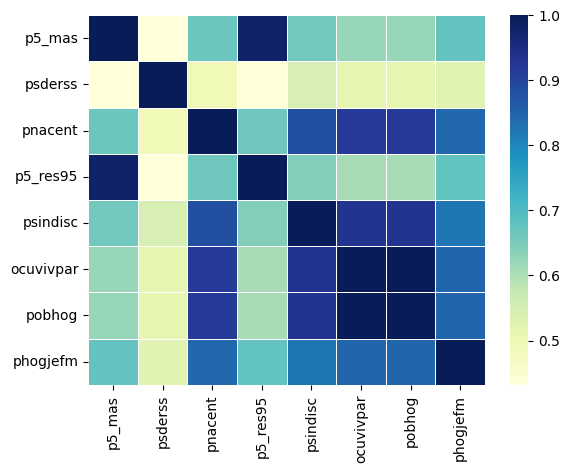

In [ ]:
# Correlation and Heatmap
import seaborn as sns 
matrix = df_selected.corr()
sns.heatmap(matrix,linewidths=.5, cmap="YlGnBu")

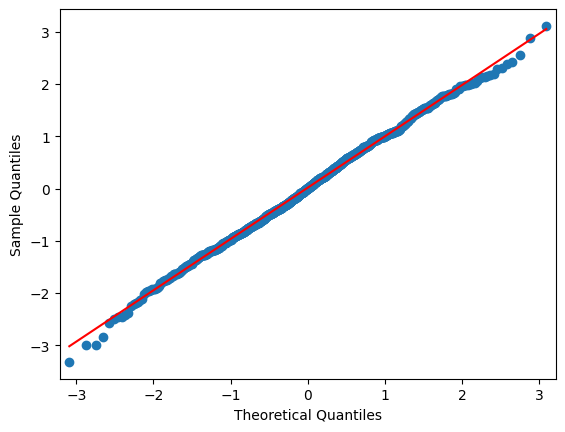

In [ ]:
# include the QQ norm to see if residuals are normal
residuals = np.random.normal(0,1, 1000)
# using 's' to get scaled line by the standard deviation and mean added) 
sm.qqplot(residuals, line='s')
pylab.show()


The Q-Q plot is useful for checking if the residuals of a model fit well to a normal distribution. If the points on the plot approximately fit the reference line (the diagonal line in this case), it suggests that the residuals follow a normal distribution.

In [ ]:
#normalize the data 

scaler = MinMaxScaler()

df_selected_norm = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

df_selected_norm.head()



,p5_mas,psderss,pnacent,p5_res95,psindisc,ocuvivpar,pobhog,phogjefm
0,0.144269,0.791498,0.183398,0.146881,0.176357,0.188931,0.188931,0.148515
1,0.614625,0.599190,0.667954,0.617706,0.649225,0.667939,0.667939,0.649505
2,0.415020,0.838057,0.471042,0.408451,0.445736,0.471374,0.471374,0.469307
3,0.770751,0.170040,0.810811,0.772636,0.757752,0.818702,0.820611,0.794059
4,0.162055,0.125506,0.208494,0.158954,0.217054,0.219466,0.219466,0.166337


In [ ]:
#verify if the normalization was done correctly

df_selected_norm.describe()




,p5_mas,psderss,pnacent,p5_res95,psindisc,ocuvivpar,pobhog,phogjefm
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.473428,0.469695,0.465076,0.473782,0.463241,0.457819,0.458230,0.462872
std,0.299778,0.295291,0.292536,0.299371,0.292104,0.292263,0.292566,0.298953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.199605,0.206478,0.200772,0.205231,0.201550,0.193225,0.195134,0.202475
50%,0.445652,0.464575,0.444015,0.443662,0.446705,0.445611,0.445611,0.436634
75%,0.741107,0.732794,0.714286,0.744467,0.715116,0.717080,0.717080,0.724752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is evident that even with the data normalized, the measures of central tendency appear to be very close to each other.

## lineal regression prediction and evaluation

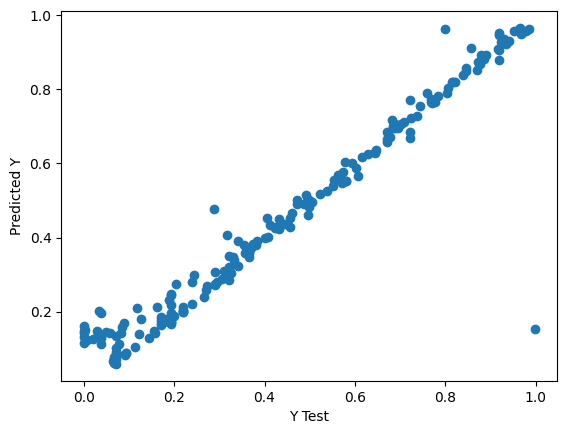

In [ ]:
#do a model with the selected columns

X = df_selected_norm.drop('psindisc', axis=1) #drop the target variable

y = df_selected_norm['psindisc'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


#do a linear regression model

lm = LinearRegression()

lm.fit(X_train, y_train)

#do a prediction

predictions = lm.predict(X_test)

#plot the predictions

plt.scatter(y_test, predictions)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

plt.show()



MAE: 0.031130013061817303
MSE: 0.005673089148685557
RMSE: 0.07531991203317724
R2: 0.933882765039831


C:\Users\jnoh5\AppData\Local\Temp\ipykernel_15644\973412279.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


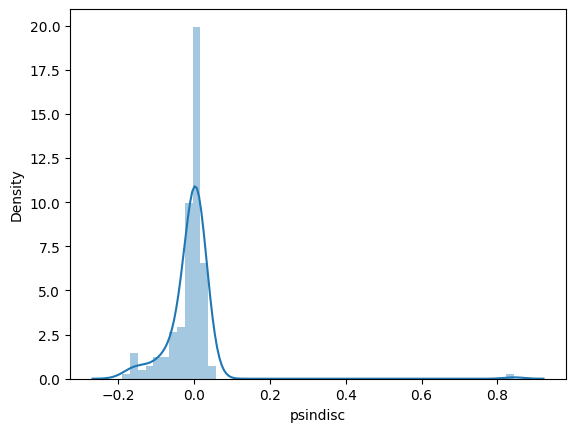

In [ ]:
#do the error analysis and score the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('R2:', metrics.r2_score(y_test, predictions))



#do a histogram of the residuals

sns.distplot((y_test - predictions), bins=50)

plt.show()

<font size="4">

- **<font color='green'>MAE:</font>** 0.031130013061817303
- **<font color='green'>MSE:</font>** 0.005673089148685557
- **<font color='green'>RMSE:</font>** 0.07531991203317724
- **<font color='green'>R2:</font>** 0.933882765039831

</font>


## Assessing Normality in Residuals

In the analysis of statistical and regression models, it's crucial to verify if the residuals follow a normal distribution. The normality of residuals is a fundamental assumption in many statistical techniques. To assess whether this assumption is met, we examine a probability density plot of the residuals.

### Key points to check for normality:

1. **Shape of the Curve**: The shape of the curve in the plot is pivotal. A symmetric, bell-shaped curve suggests that residuals follow a normal distribution. If the curve is skewed or has multiple peaks, it may indicate non-normality.

2. **Peaks and Valleys**: We observe the presence of peaks and valleys in the density curve. Peaks indicate areas of high residual density, while valleys denote areas of lower density.

3. **Width of the Curve**: The width of the curve at its broadest point provides insight into residual variability. A wider curve implies greater variability.

4. **Area under the Curve**: The total area under the curve is equal to 1, representing the total probability. We can use this area to calculate the probability of residuals falling within a specific range.

5. **Outliers**: We check for the presence of outliers in the plot. Outliers are values significantly distant from the highest density region of the distribution and may indicate model issues or unusual data.

If, upon examining the probability density plot of residuals, the above points are met and resemble a normal distribution, we can conclude that the assumption of normality is satisfied. If not, any deviations from normality should be investigated and taken into account in the model analysis.
